# Baseball Player Salary Prediction  
### A Parsimonious Regression Approach with Regularization

**Objective:**  
Build a predictive model for baseball player salaries using performance statistics, while prioritizing:
- strong generalization
- minimal feature count
- avoidance of overfitting
- interpretability

This project demonstrates an end-to-end regression workflow including EDA, multicollinearity diagnosis, regularization (Ridge & Lasso), and final model selection.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math

In [5]:
df = pd.read_csv("Datasets/Hitters_final.csv")

In [9]:
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,425
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,92


## Problem Framing

Baseball player salaries are influenced by a combination of:
- current season performance
- long-term career consistency
- experience
- defensive contribution

The goal is **not** to build the most complex model, but to identify a **stable and interpretable model** that generalizes well to unseen data.

To achieve this, we explicitly focus on:
- bias–variance tradeoff
- feature redundancy
- regularization-based feature selection


## Exploratory Data Analysis

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  322 non-null    object
 1   AtBat       322 non-null    int64 
 2   Hits        322 non-null    int64 
 3   HmRun       322 non-null    int64 
 4   Runs        322 non-null    int64 
 5   RBI         322 non-null    int64 
 6   Walks       322 non-null    int64 
 7   Years       322 non-null    int64 
 8   CAtBat      322 non-null    int64 
 9   CHits       322 non-null    int64 
 10  CHmRun      322 non-null    int64 
 11  CRuns       322 non-null    int64 
 12  CRBI        322 non-null    int64 
 13  CWalks      322 non-null    int64 
 14  PutOuts     322 non-null    int64 
 15  Assists     322 non-null    int64 
 16  Errors      322 non-null    int64 
 17  Salary      322 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 45.4+ KB


In [16]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,515.633540
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,409.805922
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,226.250000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,700.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [20]:
df = df.drop(columns=["Unnamed: 0"])

In [42]:
df.isna().sum().sort_values(ascending=False)


AtBat      0
CHmRun     0
Errors     0
Assists    0
PutOuts    0
CWalks     0
CRBI       0
CRuns      0
CHits      0
Hits       0
CAtBat     0
Years      0
Walks      0
RBI        0
Runs       0
HmRun      0
Salary     0
dtype: int64

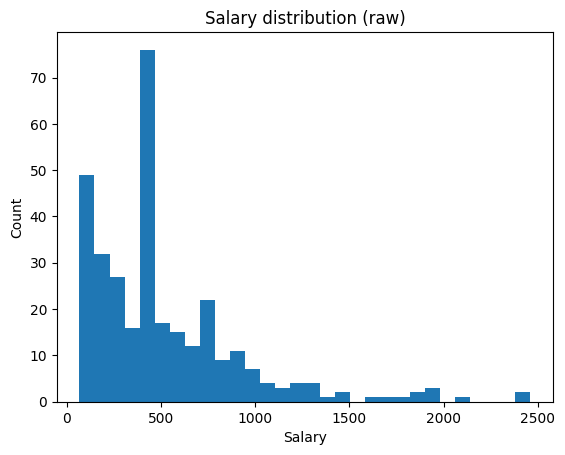

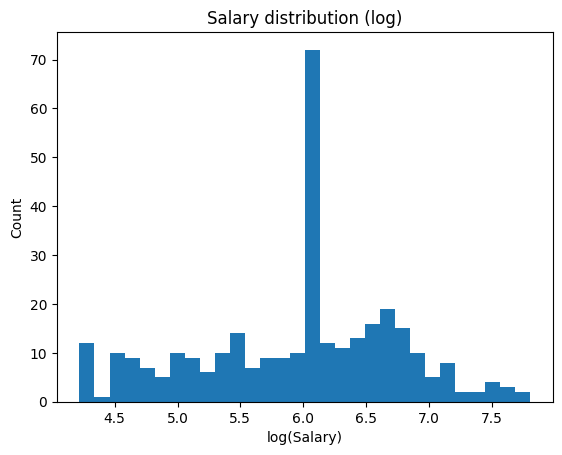

Skewness (raw Salary): 1.873761003601272
Skewness (log Salary): -0.28474893071083945


In [44]:

salary = df["Salary"]

plt.figure()
plt.hist(salary, bins=30)
plt.title("Salary distribution (raw)")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

plt.figure()
plt.hist(np.log(salary), bins=30)
plt.title("Salary distribution (log)")
plt.xlabel("log(Salary)")
plt.ylabel("Count")
plt.show()

print("Skewness (raw Salary):", salary.skew())
print("Skewness (log Salary):", np.log(salary).skew())


“The raw salary distribution was highly right-skewed (skew ≈ 1.87), violating linear regression assumptions.
Applying a log transformation reduced skewness to −0.28, producing a near-symmetric target distribution and improving model stability and generalization.”

## Baseline Linear Regression

We begin with a full linear regression model using all available predictors.

Purpose of the baseline:
- establish a reference performance
- evaluate generalization (train vs test)
- detect early signs of overfitting

This model is **not expected to be optimal**, but serves as a benchmark for improvement.


In [55]:
X = df.drop("Salary",axis=1)

In [57]:
y = np.log(df['Salary']) 

In [59]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (322, 16)
y shape: (322,)


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42
)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)


Train size: (225, 16)
Test size : (97, 16)


In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [69]:
X_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
206,407,93,8,47,30,30,2,969,230,14,121,69,68,172,317,25
81,255,70,7,49,35,43,15,6311,1661,154,1019,608,820,51,54,8
147,599,183,10,80,74,32,5,2482,715,27,330,326,158,231,374,18
39,241,61,1,34,12,14,1,241,61,1,34,12,14,166,172,10
222,381,110,9,61,45,32,7,3015,834,40,451,249,168,228,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,279,64,0,31,26,30,1,279,64,0,31,26,30,107,205,16
71,138,31,8,18,21,38,3,244,53,12,33,32,55,244,21,4
106,420,95,23,55,58,37,3,646,139,31,77,77,61,206,10,7
270,303,84,4,35,32,23,2,312,87,4,39,32,23,179,5,3


In [71]:
X_train_scaled

array([[ 0.21425083, -0.11840263, -0.31326713, ..., -0.39853756,
         1.60948798,  2.60015916],
       [-0.77620313, -0.61777801, -0.42900622, ..., -0.85030861,
        -0.36348762, -0.00544964],
       [ 1.46535056,  1.83567495, -0.08178895, ..., -0.17825251,
         2.03709106,  1.52726142],
       ...,
       [ 0.29896071, -0.07497868,  1.42281918, ..., -0.27159363,
        -0.69356719, -0.15872075],
       [-0.46342819, -0.31381038, -0.77622348, ..., -0.37240205,
        -0.73107623, -0.77180517],
       [-0.9195583 , -1.07372944, -1.00770165, ..., -0.65989271,
         0.22165343,  0.30109257]])

In [73]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)


LinearRegression()

In [75]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred  = lin_reg.predict(X_test_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test,  y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2  = r2_score(y_test,  y_test_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE : {test_rmse:.4f}")
print(f"Train R²  : {train_r2:.4f}")
print(f"Test R²   : {test_r2:.4f}")
print("RMSE gap (Test - Train):", round(test_rmse - train_rmse, 4))


Train RMSE: 0.6329
Test RMSE : 0.5689
Train R²  : 0.3996
Test R²   : 0.4502
RMSE gap (Test - Train): -0.064


### Baseline Takeaway

- Train and test performance are close → no overfitting
- Moderate R² indicates meaningful signal
- Performance is likely limited by multicollinearity among predictors

This motivates further diagnostic analysis.


## Multicollinearity Diagnosis (VIF)

Many predictors represent overlapping information, particularly:
- season statistics vs career aggregates

Variance Inflation Factor (VIF) is used to identify predictors whose coefficients are unstable due to redundancy.

High VIF values do **not** mean a feature is useless — they indicate that the feature cannot be interpreted reliably alongside others.


In [79]:
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.373432
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.415347
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.331542
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.402900
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.428773
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.424548
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.344335
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.465906
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.490012
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.448753


In [83]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Add constant for statsmodels
X_train_vif = sm.add_constant(X_train)

vif_data = []
for i, col in enumerate(X_train_vif.columns):
    vif = variance_inflation_factor(X_train_vif.values, i)
    vif_data.append((col, vif))

vif_df = pd.DataFrame(vif_data, columns=["Feature", "VIF"])
vif_df.sort_values("VIF", ascending=False)


,Feature,VIF
9,CHits,420.197540
8,CAtBat,239.640632
11,CRuns,138.623385
12,CRBI,136.465082
10,CHmRun,48.871096
2,Hits,34.593066
1,AtBat,26.222247
13,CWalks,19.693548
0,const,15.826715
4,Runs,14.394868


### Key Observation

Career statistics (e.g., CHits, CAtBat, CRuns) exhibit extremely high VIF values, confirming strong multicollinearity.

Rather than manually removing variables, we use **regularization** to resolve redundancy in a principled way.


## Ridge Regression (Variance Control)

Ridge regression shrinks correlated coefficients toward zero, improving stability without removing predictors.

We use cross-validation to select the optimal regularization strength (alpha), ensuring:
- reduced variance
- no data leakage


In [86]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
import numpy as np

alphas = np.logspace(-3, 3, 100)

ridge_model = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", RidgeCV(alphas=alphas, cv=5))
])

ridge_model.fit(X_train, y_train)

best_alpha = ridge_model.named_steps["ridge"].alpha_
print("Best Ridge alpha:", best_alpha)


Best Ridge alpha: 107.22672220103232


2️⃣ Ridge performance (train vs test)

In [91]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = ridge_model.predict(X_train)
y_test_pred  = ridge_model.predict(X_test)

ridge_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
ridge_test_rmse  = np.sqrt(mean_squared_error(y_test,  y_test_pred))

ridge_train_r2 = r2_score(y_train, y_train_pred)
ridge_test_r2  = r2_score(y_test,  y_test_pred)

print(f"Ridge Train RMSE: {ridge_train_rmse:.4f}")
print(f"Ridge Test RMSE : {ridge_test_rmse:.4f}")
print(f"Ridge Train R²  : {ridge_train_r2:.4f}")
print(f"Ridge Test R²   : {ridge_test_r2:.4f}")
print("RMSE gap (Test - Train):", round(ridge_test_rmse - ridge_train_rmse, 4))


Ridge Train RMSE: 0.6544
Ridge Test RMSE : 0.5786
Ridge Train R²  : 0.3583
Ridge Test R²   : 0.4313
RMSE gap (Test - Train): -0.0758


### Ridge Takeaway

Ridge improves coefficient stability but does not significantly improve predictive performance.
This suggests that **feature redundancy**, rather than coefficient magnitude, is the primary issue.


## Lasso Regression (Feature Selection)

Lasso regression applies an L1 penalty, which can shrink some coefficients exactly to zero.

This makes Lasso ideal for:
- resolving multicollinearity
- selecting a minimal, informative feature set
- improving interpretability


In [95]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
import numpy as np

alphas = np.logspace(-3, 3, 100)

lasso_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", LassoCV(
        alphas=alphas,
        cv=5,
        max_iter=20000,
        random_state=42
    ))
])

lasso_model.fit(X_train, y_train)

best_alpha_lasso = lasso_model.named_steps["lasso"].alpha_
print("Best Lasso alpha:", best_alpha_lasso)


Best Lasso alpha: 0.021544346900318846


In [97]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_train_pred = lasso_model.predict(X_train)
y_test_pred  = lasso_model.predict(X_test)

lasso_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
lasso_test_rmse  = np.sqrt(mean_squared_error(y_test,  y_test_pred))

lasso_train_r2 = r2_score(y_train, y_train_pred)
lasso_test_r2  = r2_score(y_test,  y_test_pred)

print(f"Lasso Train RMSE: {lasso_train_rmse:.4f}")
print(f"Lasso Test RMSE : {lasso_test_rmse:.4f}")
print(f"Lasso Train R²  : {lasso_train_r2:.4f}")
print(f"Lasso Test R²   : {lasso_test_r2:.4f}")
print("RMSE gap (Test - Train):", round(lasso_test_rmse - lasso_train_rmse, 4))


Lasso Train RMSE: 0.6501
Lasso Test RMSE : 0.5779
Lasso Train R²  : 0.3666
Lasso Test R²   : 0.4327
RMSE gap (Test - Train): -0.0723


,Feature,Coefficient,AbsCoef
8,CHits,0.237724,0.237724
6,Years,0.141765,0.141765
3,Runs,0.085918,0.085918
1,Hits,0.082866,0.082866
5,Walks,0.052791,0.052791
13,PutOuts,0.046099,0.046099
15,Errors,-0.032032,0.032032
0,AtBat,-0.000000,0.000000
2,HmRun,0.000000,0.000000
4,RBI,0.000000,0.000000


In [101]:
selected_features = coef_df[coef_df["Coefficient"] != 0]["Feature"].tolist()

print("Selected features by Lasso:")
print(selected_features)
print("Number of selected features:", len(selected_features))



Selected features by Lasso:
['CHits', 'Years', 'Runs', 'Hits', 'Walks', 'PutOuts', 'Errors']
Number of selected features: 7


### Lasso Feature Selection Result

Lasso reduced the model from ~16 predictors to **7 key features**, representing:
- career consistency
- current performance
- experience
- defensive contribution

This aligns well with domain intuition and statistical diagnostics.


## Final Model: Parsimonious Linear Regression

To remove shrinkage bias and improve interpretability, we refit a standard linear regression using only the Lasso-selected features.

This produces the final production-ready model.


In [104]:
X_train_sel = X_train[selected_features]
X_test_sel  = X_test[selected_features]


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

final_model = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

final_model.fit(X_train_sel, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('linreg', LinearRegression())])

In [108]:
y_train_pred = final_model.predict(X_train_sel)
y_test_pred  = final_model.predict(X_test_sel)

final_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
final_test_rmse  = np.sqrt(mean_squared_error(y_test,  y_test_pred))

final_train_r2 = r2_score(y_train, y_train_pred)
final_test_r2  = r2_score(y_test,  y_test_pred)

print(f"Final Train RMSE: {final_train_rmse:.4f}")
print(f"Final Test RMSE : {final_test_rmse:.4f}")
print(f"Final Train R²  : {final_train_r2:.4f}")
print(f"Final Test R²   : {final_test_r2:.4f}")
print("RMSE gap (Test - Train):", round(final_test_rmse - final_train_rmse, 4))


Final Train RMSE: 0.6486
Final Test RMSE : 0.5770
Final Train R²  : 0.3695
Final Test R²   : 0.4343
RMSE gap (Test - Train): -0.0716


### Final Model Decision

The final model achieves:
- comparable test RMSE to the full model
- over 50% reduction in features
- stable generalization (low train–test gap)
- improved interpretability

This model is selected as the optimal balance between performance and simplicity.
